In [ ]:
! pip install simpletransformers

     |████████████████████████████████| 221 kB 7.1 MB/s 
     |████████████████████████████████| 1.6 MB 59.5 MB/s 
     |████████████████████████████████| 8.0 MB 29.2 MB/s 
     |████████████████████████████████| 76 kB 6.1 MB/s 
     |████████████████████████████████| 124 kB 74.8 MB/s 
     |████████████████████████████████| 264 kB 67.7 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
     |████████████████████████████████| 1.2 MB 48.8 MB/s 
     |████████████████████████████████| 3.3 MB 49.7 MB/s 
     |████████████████████████████████| 2.6 MB 57.1 MB/s 
     |████████████████████████████████| 895 kB 64.6 MB/s 
     |████████████████████████████████| 636 kB 68.7 MB/s 
     |████████████████████████████████| 97 kB 8.5 MB/s 
     |████████████████████████████████| 133 kB 63.1 MB/s 
     |████████████████████████████████| 170 kB 44.7 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 243 kB 70.5 MB/s 
     |█████████████████

--- RESTART RUNTIME ---

Do not run the first cell again, directly run the rest of the notebook after restarting runtime. 

(if you are running on Colab)

In [ ]:
import pandas as pd 

df = pd.read_csv("/content/dft.csv")
df.head()

,Unnamed: 0,injury_report,tweet,kfold
0,0,0,hard https feeling nizbtc7jet,0
1,1,0,https x5cvdrbye staff number pitching put,0
2,2,0,well go tatis oxrycgvpom denver https join siz...,0
3,3,0,pl6mzciiam 415 come soon https oracleparksf tk...,0
4,4,0,single time jakecrousemlb read,0


In [ ]:
df.drop(['kfold', 'Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.head()

,injury_report,tweet
0,0,hard https feeling nizbtc7jet
1,0,https x5cvdrbye staff number pitching put
2,0,well go tatis oxrycgvpom denver https join siz...
3,0,pl6mzciiam 415 come soon https oracleparksf tk...
4,0,single time jakecrousemlb read


In [ ]:
print(set(df['injury_report'].values))

{0, 1}


In [ ]:
df.injury_report = pd.Categorical(df.injury_report)
df['injury_report'] = df['injury_report'].cat.codes
df = df.dropna()

In [ ]:
df_new = df[["tweet", "injury_report"]]

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_new, random_state=91)

In [ ]:
from simpletransformers.classification import ClassificationModel

2021-08-12 14:56:33.884800: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [ ]:
df_new

,tweet,injury_report
0,hard https feeling nizbtc7jet,0
1,https x5cvdrbye staff number pitching put,0
2,well go tatis oxrycgvpom denver https join siz...,0
3,pl6mzciiam 415 come soon https oracleparksf tk...,0
4,single time jakecrousemlb read,0
...,...,...
14922,line kind craig game counsell libka brewer cle...,0
14923,increase completely sweat initially usage earl...,0
14924,bring d8zyjpt6q0 jlldt2hqua tothemoon https st...,0
14925,2lt3lkdopw go week https mlb amp throw play,0


In [ ]:
# set use_cuda=False on CPU-only platforms
bert = ClassificationModel('bert', 'bert-base-uncased', num_labels=2, use_cuda=True, args={
    'reprocess_input_data': True,
    'use_cached_eval_features': False,
    'overwrite_output_dir': True,
    'num_train_epochs': 2,
})
bert.train_model(train)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:616: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/11195 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/1400 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:942: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  model.parameters(), args.max_grad_norm


Running Epoch 1 of 2:   0%|          | 0/1400 [00:00<?, ?it/s]

(2800, 0.14287342931185518)

In [ ]:
import matplotlib.pyplot as plt
import sklearn
import numpy as np

#others
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from scipy.special import softmax

In [ ]:
result, model_outputs, wrong_predictions = bert.eval_model(test, acc=sklearn.metrics.accuracy_score)
print(result)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1402: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/3732 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/467 [00:00<?, ?it/s]

{'mcc': 0.8400245136544038, 'tp': 231, 'tn': 3420, 'fp': 52, 'fn': 29, 'auroc': 0.9829747873094647, 'auprc': 0.8917167595397241, 'acc': 0.9782958199356914, 'eval_loss': 0.08657202245847061}


In [ ]:
result, model_outputs, wrong_predictions = bert.eval_model(test, acc=confusion_matrix)
result

  0%|          | 0/3732 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/467 [00:00<?, ?it/s]

{'mcc': 0.8400245136544038,
 'tp': 231,
 'tn': 3420,
 'fp': 52,
 'fn': 29,
 'auroc': 0.9829747873094647,
 'auprc': 0.8917167595397241,
 'acc': array([[3420,   52],
        [  29,  231]]),
 'eval_loss': 0.08657202245847061}

In [ ]:
cm = result["acc"]

recall = np.mean(np.diag(cm) / np.sum(cm, axis = 1))
precision = np.mean(np.diag(cm) / np.sum(cm, axis = 0))

print(precision, recall)

0.9039230913451638 0.9367422899680964


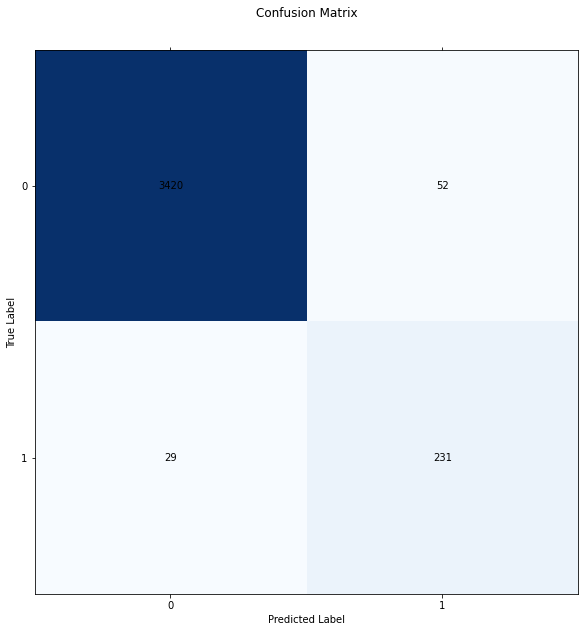

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

intersection_matrix = cm

ax.matshow(intersection_matrix, cmap=plt.cm.Blues)

for i in range(2):
    for j in range(2):
        c = intersection_matrix[j,i]
        ax.text(i, j, str(c), va='center', ha='center')

plt.xticks(range(0, 2))
ax.tick_params(axis="x", labelbottom=True, labeltop=False)
plt.yticks(np.arange(0, 2, step=1))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()